In [1]:
import os
import tensorflow as tf

from lob.lob_gan import *

%load_ext autoreload
%autoreload 2

imported at 2025-04-20 12:35:44.876146


In [2]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
RAW_DATA = pd.read_parquet('lob/BTCUSDT-lob.parq', engine='pyarrow')
assert RAW_DATA.notna().all(axis=None)
RAW_DATA

,E,T,U,u,pu,b0p,b1p,b2p,b3p,b4p,...,a0q,a1q,a2q,a3q,a4q,a5q,a6q,a7q,a8q,a9q
0,1739868923498,1739868923498,6783640382776,6783640393900,6783640382281,95179.9,95179.5,95179.0,95178.7,95178.0,...,8.937,0.190,0.036,0.002,0.095,0.002,0.002,0.002,0.158,0.002
1,1739868923614,1739868923610,6783640396586,6783640404328,6783640393900,95179.9,95179.5,95179.0,95178.7,95178.0,...,8.953,0.154,0.002,0.095,0.002,0.002,0.002,0.158,0.002,0.002
2,1739868923724,1739868923721,6783640405138,6783640420666,6783640404328,95179.9,95179.5,95179.0,95178.7,95178.0,...,8.953,0.154,0.042,0.002,0.095,0.002,0.002,0.002,0.158,0.004
3,1739868923827,1739868923821,6783640421340,6783640434389,6783640420666,95179.9,95179.5,95179.0,95178.7,95178.0,...,8.953,0.154,0.042,0.002,0.095,0.002,0.002,0.002,0.158,0.004
4,1739868923948,1739868923946,6783640436896,6783640445572,6783640434389,95179.9,95179.5,95179.0,95178.7,95178.0,...,8.957,0.154,0.042,0.002,0.095,0.002,0.002,0.002,0.158,0.004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189755,1739937377488,1739937377486,6791359179849,6791359186272,6791359179542,95733.3,95733.2,95733.1,95733.0,95732.9,...,0.884,0.007,0.002,0.014,0.050,0.002,0.002,0.002,0.002,0.010
189756,1739937377596,1739937377595,6791359186752,6791359194092,6791359186272,95733.3,95733.2,95733.1,95733.0,95732.9,...,1.438,0.007,0.002,0.014,0.050,0.002,0.002,0.002,0.002,0.010
189757,1739937377698,1739937377697,6791359194379,6791359202977,6791359194092,95733.3,95733.2,95733.1,95733.0,95732.9,...,5.604,0.007,0.002,0.014,0.002,0.050,0.002,0.002,0.002,0.002
189758,1739937377806,1739937377806,6791359203537,6791359209077,6791359202977,95733.3,95733.2,95733.1,95733.0,95732.9,...,5.453,0.007,0.002,0.014,0.002,0.050,0.002,0.002,0.002,0.002


In [4]:
%%time

SAMPLE_SIZE = min(len(RAW_DATA), Config().sample_size)
BATCH_SIZE = SAMPLE_SIZE // Config().n_batches

LOB_DATASET = create_dataset(RAW_DATA, sample_size=SAMPLE_SIZE, batch_size=BATCH_SIZE)

CPU times: user 20.5 ms, sys: 8.83 ms, total: 29.4 ms
Wall time: 28.5 ms


{'neg_qty_sum': 0.0,
 'neg_qty_count': 0.0,
 'neg_diff_sum': 0.0,
 'neg_diff_count': 0.0}

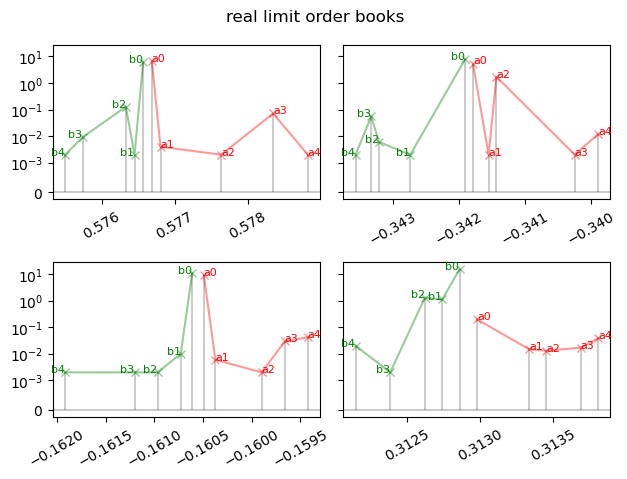

CPU times: user 1.06 s, sys: 82.5 ms, total: 1.15 s
Wall time: 507 ms


In [5]:
%%time

for i, batch in enumerate(LOB_DATASET):
    ss = calculate_sample_stats(batch)
    display(ss)
    f, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, sharey=True)
    f.suptitle('real limit order books')
    plot_lob_snapshot(batch[0], ax0)
    plot_lob_snapshot(batch[1], ax1)
    plot_lob_snapshot(batch[2], ax2)
    plot_lob_snapshot(batch[3], ax3)
    plt.tight_layout()
    plt.show()
    break

batch_size=1250


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 64/64 [00:56<00:00,  1.13it/s]

Training completed in 0.95 minutes
plot_training_history


,disc_loss,real_loss,fake_loss,gen_loss,adv_loss,fm_loss_h,fm_loss_e,real_prob,fake_prob,neg_qty_sum,neg_qty_count,neg_diff_sum,neg_diff_count
0,0.851807,0.254089,0.597718,1.068861,1.068861,0.0,0.0,0.842868,0.422885,1.861687,2.5728,18.199152,21.285599
1,0.310293,0.071428,0.238865,2.065842,2.065842,0.0,0.0,0.954492,0.199565,3.076076,3.2520,34.132187,24.606400
2,0.256532,0.126736,0.129796,3.020716,3.020716,0.0,0.0,0.922254,0.113671,4.444052,3.6136,43.733593,23.164000
3,0.448914,0.228292,0.220622,3.473087,3.473087,0.0,0.0,0.859928,0.159806,3.417875,3.1704,28.308336,19.076000
4,1.024760,0.617511,0.407249,3.169278,3.169278,0.0,0.0,0.710086,0.259497,2.764884,2.1568,20.656790,17.125599
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.439007,0.340291,0.098716,47.062069,47.062069,0.0,0.0,0.856039,0.039047,121.862259,5.0120,13.892016,29.850399
60,0.189367,0.130552,0.058815,69.084611,69.084611,0.0,0.0,0.918968,0.022914,131.477020,4.9824,13.927553,29.803999
61,0.098905,0.068066,0.030839,102.129284,102.129284,0.0,0.0,0.952007,0.011478,127.901321,4.8968,14.732378,29.088799
62,0.062073,0.040202,0.021871,134.083260,134.083260,0.0,0.0,0.969821,0.006844,181.548447,3.9936,16.928839,27.948799


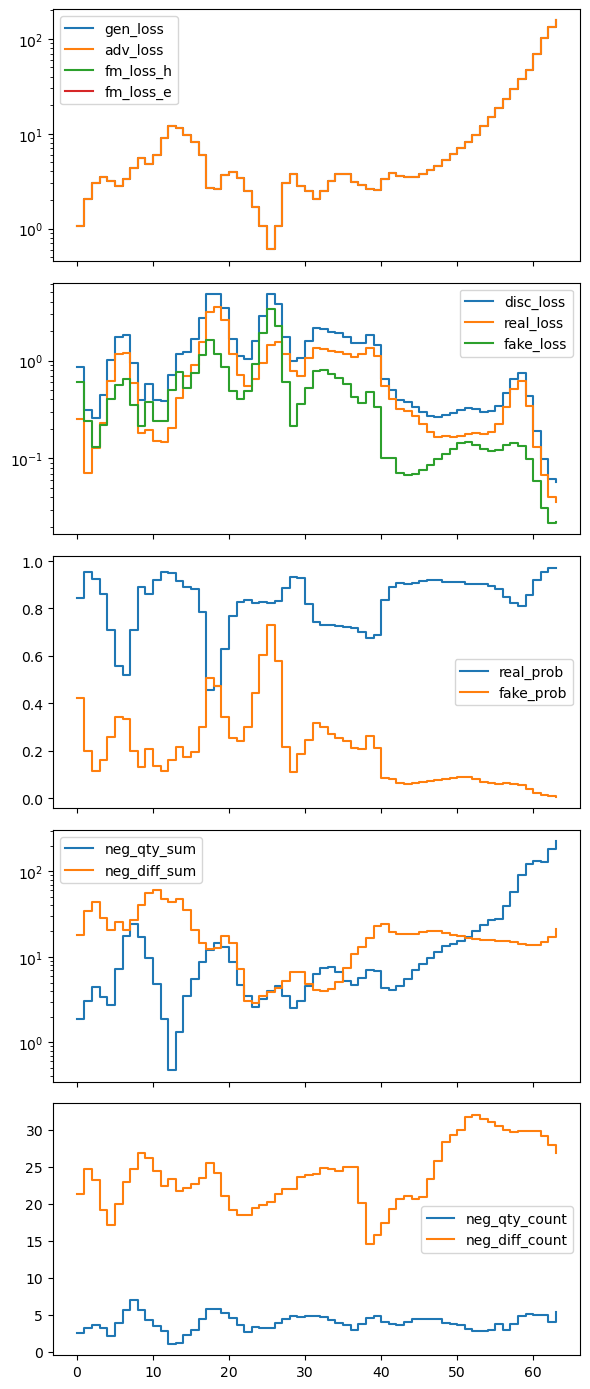

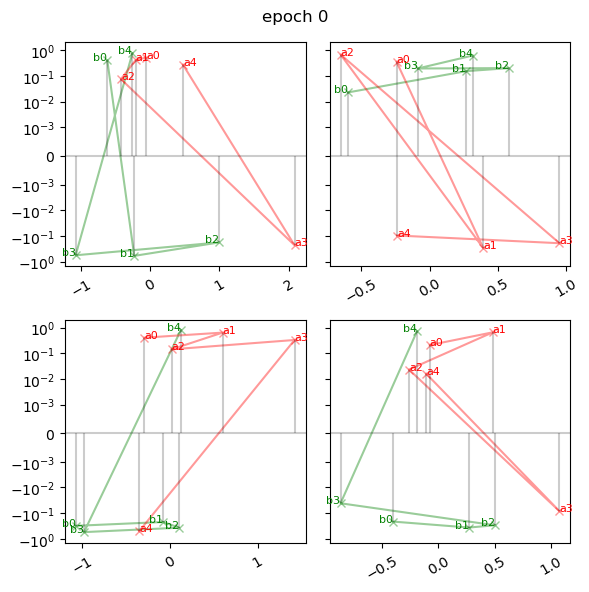

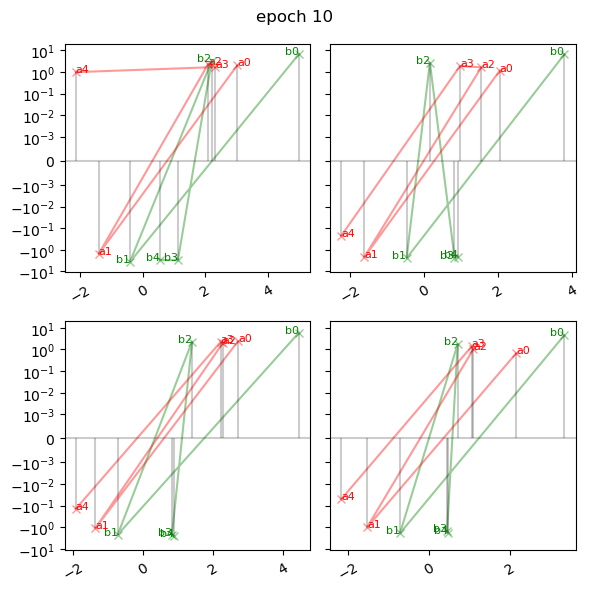

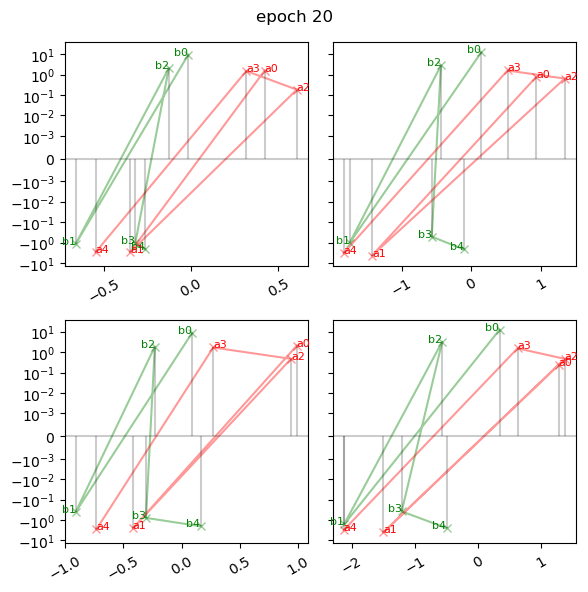

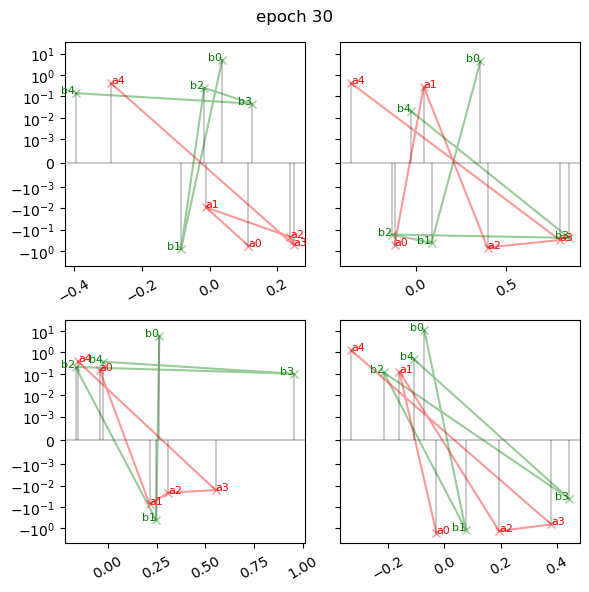

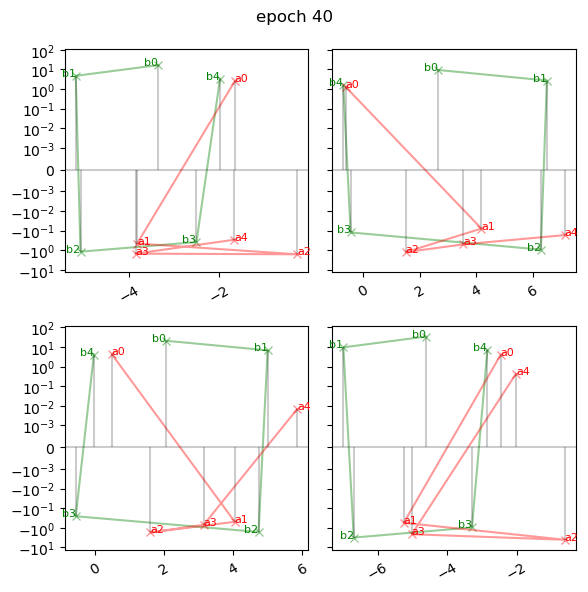

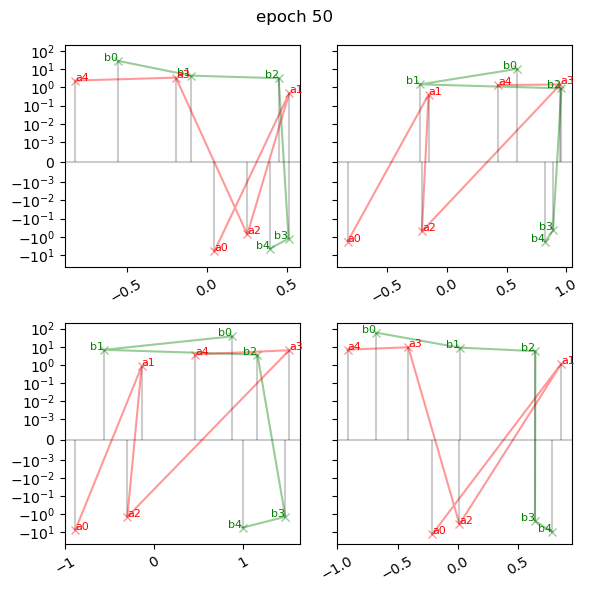

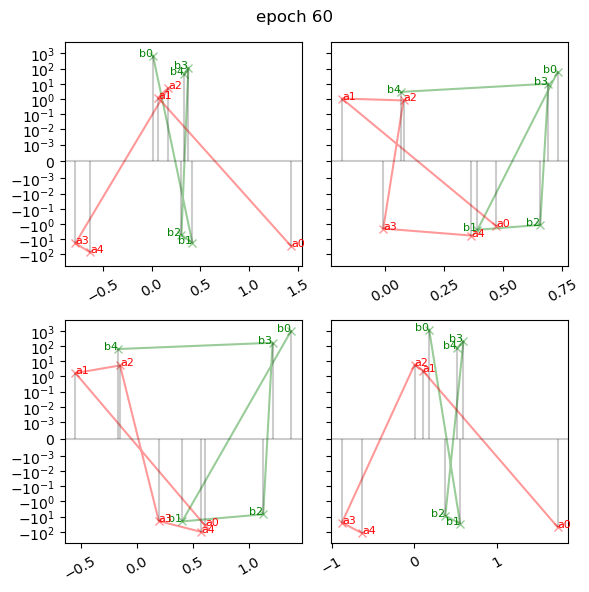

In [6]:
gan = ImprovedGAN(RAW_DATA, Config())
outputs = gan.train()
plot_training_history(outputs.metrics)
plot_lobs(outputs.lobs)

In [ ]:
gan = ImprovedGAN(RAW_DATA, Config(fm_weight_h=1.0, fm_weight_e=1.0))
outputs = gan.train()
plot_training_history(outputs.metrics)
plot_lobs(outputs.lobs)

batch_size=1250


 61%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                          | 39/64 [00:44<00:25,  1.04s/it]